In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
control = np.random.randint(1,21,500)

In [3]:
"""
D1 = Black Chessex dice
D2 = Clear Gamescience dice
D3 = Black Level Up dice
LH = Left Hand
RH = Right Hand
"""

df = pd.read_csv("./rolls.csv")

In [4]:
df.apply(pd.Series.value_counts)

,D1 LH,D1 RH,D2 LH,D2 RH,D3 LH,D3 RH
1,22,21,25,21,33,36
2,22,32,28,26,34,48
3,32,33,31,30,38,43
4,21,28,32,33,25,20
5,23,25,32,29,44,36
6,25,21,21,32,35,33
7,16,26,22,29,35,20
8,20,21,23,29,23,14
9,28,34,28,22,35,41
10,35,33,27,23,28,24


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ACF02DFEB8>,
      dtype=object)

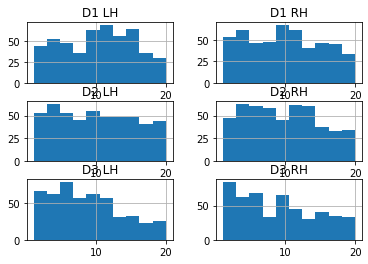

In [5]:
df.hist()

In [6]:
df.describe()

,D1 LH,D1 RH,D2 LH,D2 RH,D3 LH,D3 RH
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10.336000,9.870000,10.002000,9.660000,8.526000,8.834000
std,5.372227,5.538452,5.755715,5.388364,5.263529,5.791159
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,5.000000,5.000000,5.000000,4.000000,3.000000
50%,11.000000,10.000000,10.000000,9.000000,8.000000,8.500000
75%,15.000000,14.250000,15.000000,14.000000,12.000000,13.000000
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


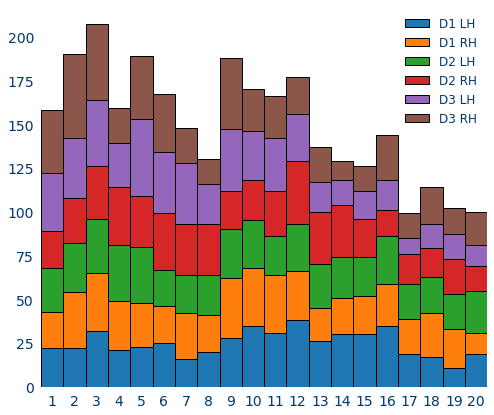

In [7]:
fig, ax = plt.subplots(figsize=(8,7))
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    
plt.hist(np.asarray(df), bins=range(22), stacked=True, edgecolor='k', label=df.columns)
legend = plt.legend(prop={'size': 12})
legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0.0))
ax.tick_params(colors='#003672')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.setp(legend.get_texts(), color='#003672')
bins_labels(range(22), fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(left = False, bottom = False)
plt.xlim([1, 21])
plt.show()
fig.savefig('demo.png', transparent=True)

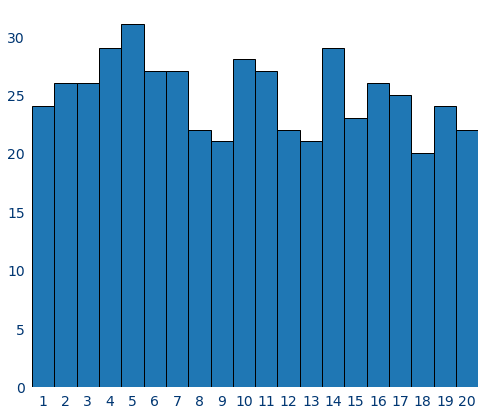

In [8]:
fig, ax = plt.subplots(figsize=(8,7))
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    
plt.hist(control, bins=range(22), stacked=True, edgecolor='k')
ax.tick_params(colors='#003672')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.setp(legend.get_texts(), color='#003672')
bins_labels(range(22), fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(left = False, bottom = False)
plt.xlim([1, 21])
plt.show()
fig.savefig('demo.png', transparent=True)

In [9]:
expected = pd.DataFrame(control, columns=['Roll']).Roll.value_counts(sort=False).sort_index()
for column in df.columns:
    print(f"{column}: {stats.chisquare(f_obs=df[column].value_counts(sort=False).sort_index(), f_exp=expected)}")

D1 LH: Power_divergenceResult(statistic=43.3733526440082, pvalue=0.00115223694166192)
D1 RH: Power_divergenceResult(statistic=27.722820295467443, pvalue=0.08891011886802722)
D2 LH: Power_divergenceResult(statistic=12.219413880270146, pvalue=0.876033587874145)
D2 RH: Power_divergenceResult(statistic=30.383799555567947, pvalue=0.047112592837645)
D3 LH: Power_divergenceResult(statistic=67.48602869205688, pvalue=2.3952380498205847e-07)
D3 RH: Power_divergenceResult(statistic=88.80126172727107, pvalue=5.405730238105264e-11)


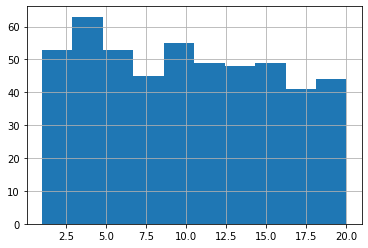

In [10]:
df['D2 LH'].hist()

In [11]:
df = pd.melt(df)

df.describe()

,value
count,3000.000000
mean,9.538000
std,5.554773
min,1.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,20.000000


In [12]:
[df.value.value_counts(sort=False).sort_index()]

[1     158
 2     190
 3     207
 4     159
 5     189
 6     167
 7     148
 8     130
 9     188
 10    170
 11    166
 12    177
 13    137
 14    129
 15    126
 16    144
 17     99
 18    114
 19    102
 20    100
 Name: value, dtype: int64]

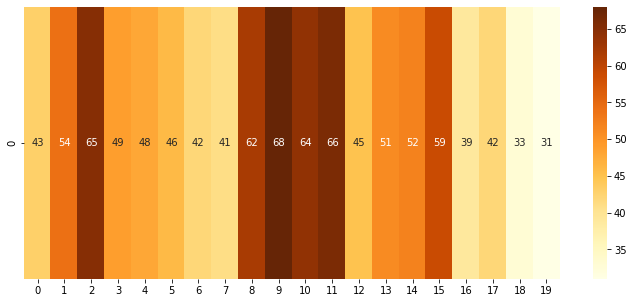

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap([df[df.variable.str.contains("D1")].value.value_counts(sort=False).sort_index()], 
            annot=True, fmt="g", cmap='YlOrBr')

plt.show()

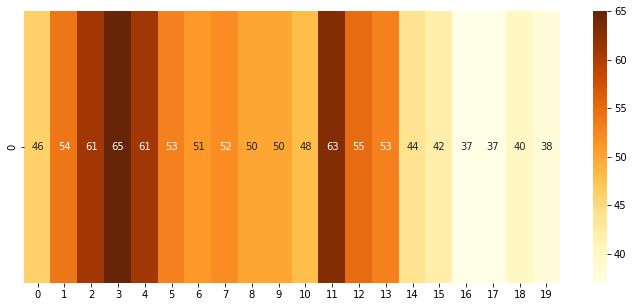

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap([df[df.variable.str.contains("D2")].value.value_counts(sort=False).sort_index()], 
            annot=True, fmt="g", cmap='YlOrBr')

plt.show()

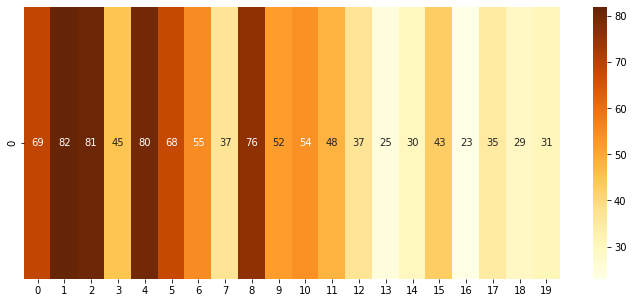

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap([df[df.variable.str.contains("D3")].value.value_counts(sort=False).sort_index()], 
            annot=True, fmt="g", cmap='YlOrBr')

plt.show()

In [16]:
def calc_advantages(df):
    df_adv = []
    for i, g in df.groupby(df.index // 2):
        df_adv.append(max(g))
    return pd.DataFrame(df_adv)

In [17]:
def calc_averaging(df):
    df_adv = []
    for i, g in df.groupby(df.index // 2):
        df_adv.append(np.mean(g))
    return pd.DataFrame(df_adv)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ACF103A550>]],
      dtype=object)

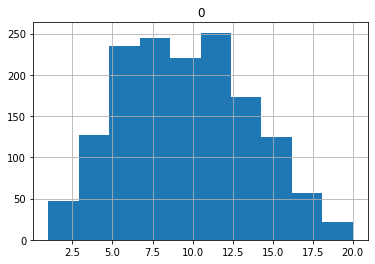

In [18]:
df_adv = calc_averaging(df['value'])
df_adv.hist()

In [19]:
df_adv = calc_advantages(df['value'])
df_adv.describe()

,0
count,1500.00000
mean,12.71000
std,4.76414
min,1.00000
25%,9.00000
50%,13.00000
75%,17.00000
max,20.00000


In [20]:
df_adv_c = calc_advantages(pd.DataFrame(control)[0])
df_adv_c.describe()

,0
count,250.000000
mean,13.592000
std,4.724704
min,2.000000
25%,10.000000
50%,14.000000
75%,17.000000
max,20.000000


In [21]:
stats.chisquare(f_obs=df['value'].value_counts(sort=False).sort_index(), f_exp=expected)

Power_divergenceResult(statistic=13258.185413250429, pvalue=0.0)

In [22]:
df[df.variable.str.contains("LH")].describe()

,value
count,1500.000000
mean,9.621333
std,5.520591
min,1.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,20.000000


In [23]:
df[df.variable.str.contains("RH")].describe()

,value
count,1500.000000
mean,9.454667
std,5.589345
min,1.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,20.000000


In [24]:
df[df.variable.str.contains("D1")].describe()

,value
count,1000.000000
mean,10.103000
std,5.458222
min,1.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,20.000000


In [25]:
df[df.variable.str.contains("D2")].describe()

,value
count,1000.000000
mean,9.831000
std,5.574901
min,1.000000
25%,5.000000
50%,10.000000
75%,14.000000
max,20.000000


In [26]:
df[df.variable.str.contains("D3")].describe()

,value
count,1000.000000
mean,8.680000
std,5.533011
min,1.000000
25%,4.000000
50%,8.000000
75%,13.000000
max,20.000000


In [27]:
df.value.value_counts()

3     207
2     190
5     189
9     188
12    177
10    170
6     167
11    166
4     159
1     158
7     148
16    144
13    137
8     130
14    129
15    126
18    114
19    102
20    100
17     99
Name: value, dtype: int64

In [28]:
def RLE(df):
    n = len(df)
    i = 0
    max_h = 0
    max_l = 0
    while i < n- 1:
        count = 1
        while (i < n - 1 and df[i] == df[i + 1]):
            count += 1
            if df[i] == "+" and count > max_h : max_h = count
            if df[i] == "-" and count > max_l : max_l = count
            i += 1
        i += 1
    return max_h, max_l

runs = np.asarray(["" for i in range(3000)])
runs[df.value > 10] = "+"
runs[df.value <= 10] = "-"
max_h, max_l = RLE(runs)

print(f"Longest run of +: {max_h}")
print(f"Longest run of -: {max_l}")

Longest run of +: 8
Longest run of -: 13
